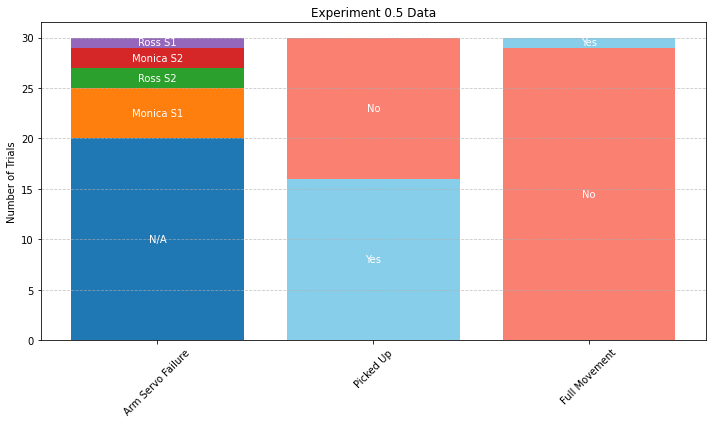

In [7]:
## Plot the data collected in logbook
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sample data
file = "/home/sachib/Downloads/24-05-15 Logbook Experiment 0.5.xlsx"
df = pd.read_excel(file)

def plot_stacked_bars(df,filename=None):
    plt.figure(figsize=(10, 6))
    bottoms = [0] * len(df.columns)  # Initialize bottom values for stacking
    color_palette = {'Yes': 'skyblue', 'No': 'salmon'}

    for i, (colname, col) in enumerate(df.items()):
         # Convert NaN values to string representation ('NaN') before counting
        col_with_nan = col.fillna('N/A')
        pivot_df = col_with_nan.value_counts()

        
        for index, value in enumerate(pivot_df):
            plt.bar(i, value, bottom=bottoms[i], label=pivot_df.index[index], color=color_palette.get(pivot_df.index[index]))
            bottoms[i] += value
            label = pivot_df.index[index]
            plt.text(i, bottoms[i] - value / 2, label, ha='center', va='center', color='white', fontsize=10)

    plt.title('Experiment 0.5 Data')
    plt.ylabel('Number of Trials')
    plt.xticks(range(len(df.columns)), df.columns, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save the plot if filename is provided
    if filename:
        plt.savefig(filename, dpi=300, facecolor='white')  # Set the desired resolution (dots per inch)

    plt.show()

plot_stacked_bars(df[['Arm Servo Failure', 'Picked Up', 'Full Movement']],"Figures/Experiment 0.5 Data.png")


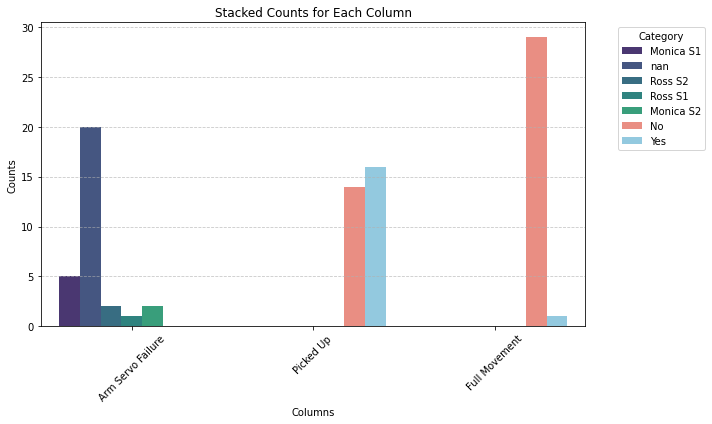

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_stacked_bars_seaborn(df, filename=None):
    plt.figure(figsize=(10, 6))

    # Melt the DataFrame to long format
    melted_df = df.melt()

    # Convert the 'value' column to string
    melted_df['value'] = melted_df['value'].astype(str)

    # Create a color palette dictionary
    color_palette = {'Yes': 'skyblue', 'No': 'salmon', 'NaN': 'lightgray'}  # Add more colors if needed

    # Get unique values in the 'value' column
    unique_values = melted_df['value'].unique()

    # Generate palette using Seaborn's color_palette function
    generated_palette = sns.color_palette('viridis', n_colors=len(unique_values))

    # Map unique values to colors in the palette
    dynamic_palette = {value: color_palette.get(value, generated_palette[i]) for i, value in enumerate(unique_values)}

    # Plot stacked bar plot using Seaborn
    sns.countplot(data=melted_df, x='variable', hue='value', palette=dynamic_palette)

    plt.title('Stacked Counts for Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)  # Set x-axis ticks rotation
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the plot if filename is provided
    if filename:
        plt.savefig(filename, dpi=300, facecolor='white')  # Set the background color to white

    plt.show()

# Call function
plot_stacked_bars_seaborn(df[['Arm Servo Failure', 'Picked Up', 'Full Movement']], filename='Figures/stacked_bars_seaborn.png')

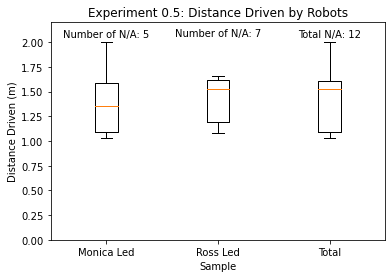

<Figure size 432x288 with 0 Axes>

In [10]:
## Plot the distnace driven by robots in box and whisker plot

import matplotlib.pyplot as plt

# Sample data
monica_data = [0,1.058,0,1.17,1.03,0,0,1.095,1.09,1.6,1.54,2,1.83,0,1.535]
ross_data = [1.08,1.615,0,0,0,1.19,0,0,0,0,1.66,1.53]

def count_zeros(data):
    """Count the number of zeros in the data set."""
    return data.count(0)

# Count the number of zeros in the data
monica_zeros = count_zeros(monica_data)
ross_zeros = count_zeros(ross_data)
total_zeros = monica_zeros + ross_zeros

# Filter out the zeros for the box plot
filtered_monica = [x for x in monica_data if x != 0]
filtered_ross = [x for x in ross_data if x != 0]
filtered_total = filtered_monica + filtered_ross

# Create a box and whisker plot
plt.boxplot(filtered_monica, positions=[1], widths=0.2, labels=['Monica Led'])
plt.boxplot(filtered_ross, positions=[2], widths=0.2, labels=['Ross Led'])
plt.boxplot(filtered_total, positions=[3], widths=0.2, labels=['Total'])

# Add a title and labels
plt.title('Experiment 0.5: Distance Driven by Robots')
plt.xlabel('Sample')
plt.ylabel('Distance Driven (m)')

# Adjust the y-axis limit to make room for the text
plt.ylim(0,2.2)

# Add text showing the number of zeros above the box plot
plt.text(1, max(filtered_monica) + 0.05, f'Number of N/A: {monica_zeros}', ha='center', fontsize=10)
plt.text(2, max(filtered_ross) + 0.4, f'Number of N/A: {ross_zeros}', ha='center', fontsize=10)
plt.text(3, max(filtered_total) + 0.05, f'Total N/A: {total_zeros}', ha='center', fontsize=10)

# Show the plot
plt.show()
# Save plot to folder
plt.savefig("Figures/Experiment 0.5: Distance Driven by Robots.png", dpi=300, facecolor='white')  # Set the background color to white